**Medical Cost Prediction**

In [1]:
#importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('/content/insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
df.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


**Data Preprocessing**

In [8]:
#checking for missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [10]:
#checking discriptive statistics
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


In [7]:
#number of rows and columns
df.shape

(1338, 7)

In [11]:
print(df.sex.value_counts(),'\n',df.smoker.value_counts(),'\n',df.region.value_counts())

male      676
female    662
Name: sex, dtype: int64 
 no     1064
yes     274
Name: smoker, dtype: int64 
 southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64


Replacing the categorical variables with numerical values.

sex : 1 - male, 0 - female

smoker : 1 - yes, 0 - no

region : 0 - northeast, 1 - northwest, 2 - southeast, 3 - southwest






In [12]:
#changing categorical variables to numerical
df['sex'] = df['sex'].map({'male':1,'female':0})
df['smoker'] = df['smoker'].map({'yes':1,'no':0})
df['region'] = df['region'].map({'southwest':0,'southeast':1,'northwest':2,'northeast':3})

In [13]:

df.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,0,16884.92400
1,18,1,33.770,1,0,1,1725.55230
2,28,1,33.000,3,0,1,4449.46200
3,33,1,22.705,0,0,2,21984.47061
4,32,1,28.880,0,0,2,3866.85520
5,31,0,25.740,0,0,1,3756.62160
6,46,0,33.440,1,0,1,8240.58960
7,37,0,27.740,3,0,2,7281.50560
8,37,1,29.830,2,0,3,6406.41070
9,60,0,25.840,0,0,2,28923.13692


**Exploratory Data Analysis (EDA)**

Visualization of the data is a good way to understand the data. In this section, I will plot the distribution of each variable to get an overview about their counts and distributions.

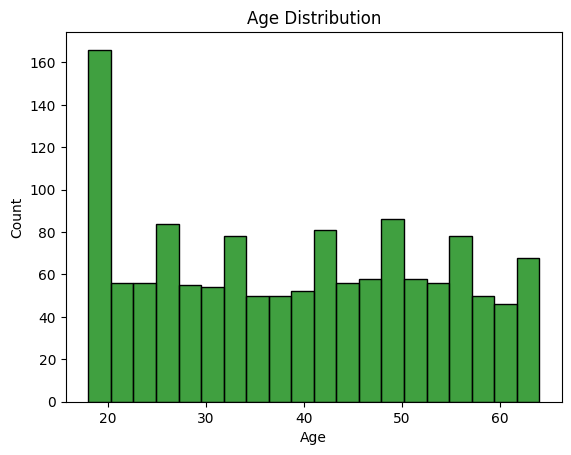

In [14]:
#age distribution
sns.histplot(df.age,bins=20, kde=False,color='green')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

Text(0.5, 1.0, 'Gender Distribution')

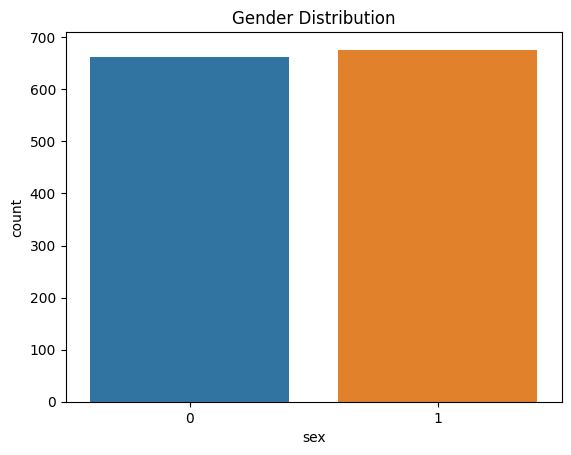

In [15]:
#gender plot
sns.countplot(x = 'sex', data = df)
plt.title('Gender Distribution')

It is clear that number of males and females are almost equal in the dataset.

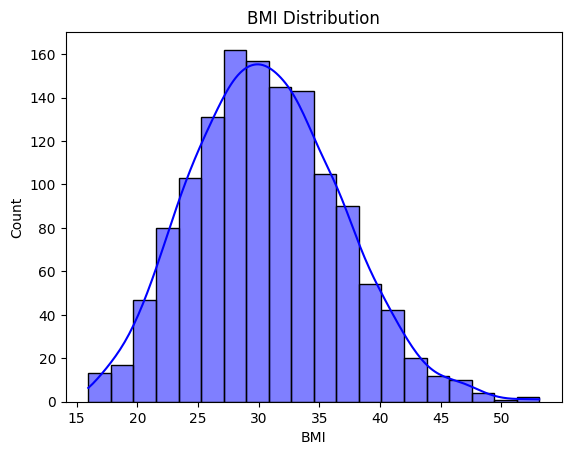

In [19]:
#BMI distribution
sns.histplot(df.bmi,bins=20, kde=True,color='blue')
plt.title('BMI Distribution')
plt.xlabel('BMI')
plt.ylabel('Count')
plt.show()

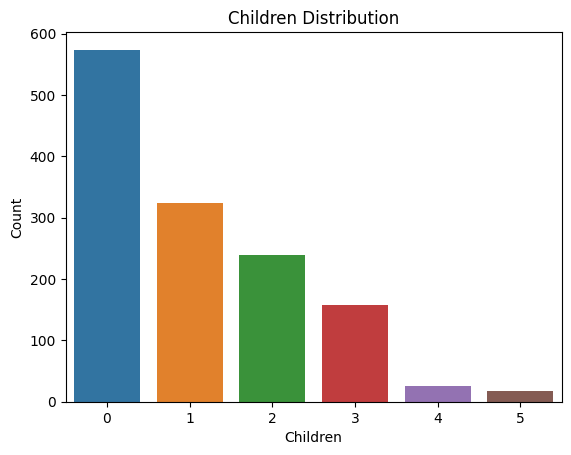

In [20]:
#child count distribution
sns.countplot(x = 'children', data = df)
plt.title('Children Distribution')
plt.xlabel('Children')
plt.ylabel('Count')
plt.show()

The graph clearly shows that most of the patients have no children and very few patients have more than 3 children.

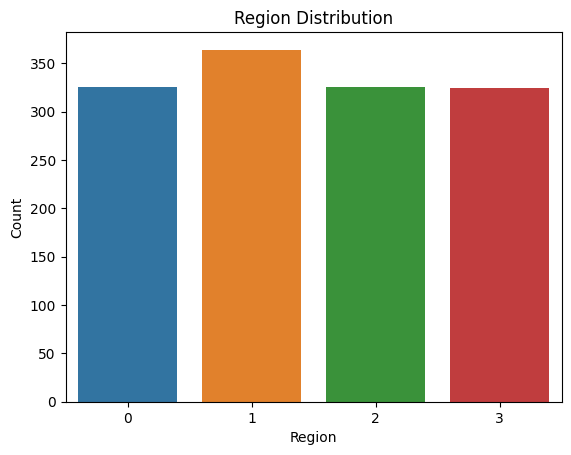

In [21]:
#regionwise plot
sns.countplot(x = 'region', data = df)
plt.title('Region Distribution')
plt.xlabel('Region')
plt.ylabel('Count')
plt.show()

The count of patient from northwest is slighltly higher than the other regions, but the number of patients from other regions are almost equal.

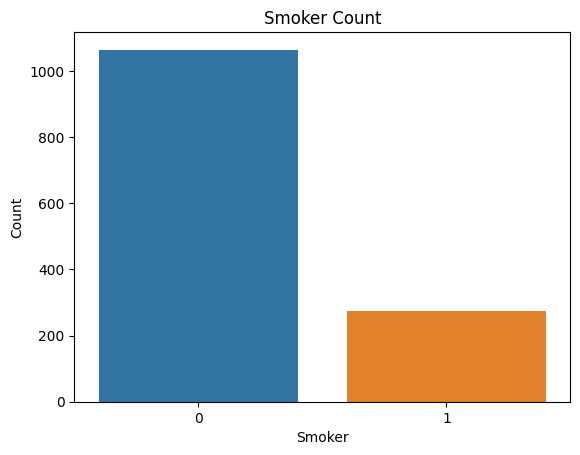

In [22]:
#count of smokers
sns.countplot(x = 'smoker', data = df)
plt.title('Smoker Count')
plt.xlabel('Smoker')
plt.ylabel('Count')
plt.show()

smokers are very few in the dataset. Nearly 80% of the patients are non-smokers.

Smoker count with respect to the children count.

<Axes: xlabel='smoker', ylabel='count'>

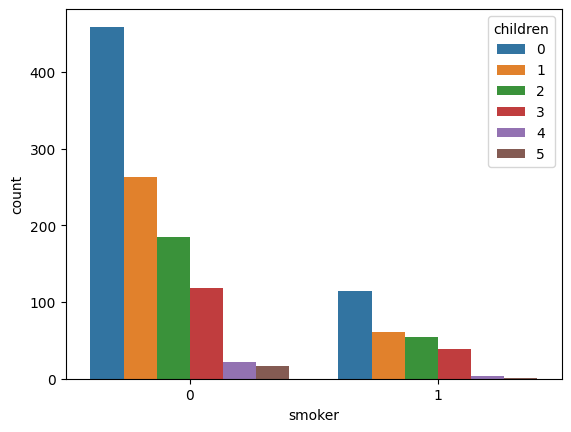

In [23]:

sns.countplot(x = df.smoker, hue = df.children)

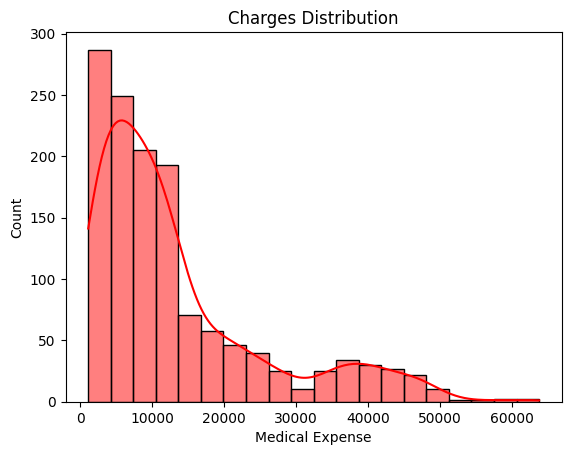

In [24]:
#charges distribution
sns.histplot(df.charges,bins=20, kde=True,color='red')
plt.title('Charges Distribution')
plt.xlabel('Medical Expense')
plt.ylabel('Count')
plt.show()

Most of the medical expenses are below 20000, with negligible number of patients having medical expenses above 50000.

From all the above plots, we have a clear understanding about the count of patients under each category of the variables. Now I will look into the coorelation between the variables.

**Coorelation**

In [25]:
#coorelation matrix
df.corr().T

,age,sex,bmi,children,smoker,region,charges
age,1.000000,-0.020856,0.109272,0.042469,-0.025019,-0.002127,0.299008
sex,-0.020856,1.000000,0.046371,0.017163,0.076185,-0.004588,0.057292
bmi,0.109272,0.046371,1.000000,0.012759,0.003750,-0.157566,0.198341
children,0.042469,0.017163,0.012759,1.000000,0.007673,-0.016569,0.067998
smoker,-0.025019,0.076185,0.003750,0.007673,1.000000,0.002181,0.787251
region,-0.002127,-0.004588,-0.157566,-0.016569,0.002181,1.000000,0.006208
charges,0.299008,0.057292,0.198341,0.067998,0.787251,0.006208,1.000000


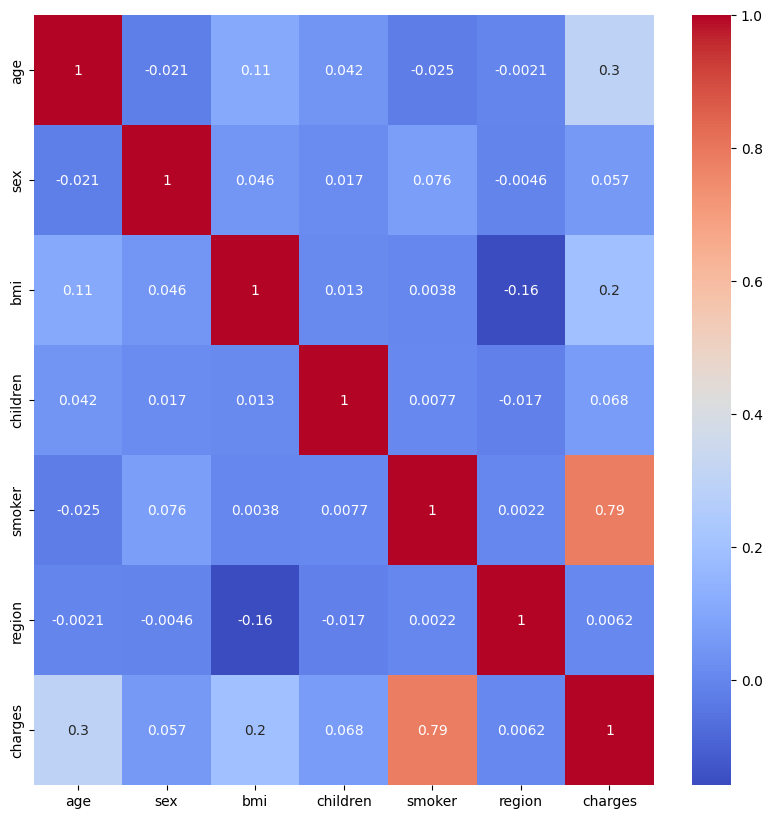

In [29]:
#plotting the coorelation heatmap
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True,cmap='coolwarm')
plt.show()

**Plotting the smoker count with patient's gender**

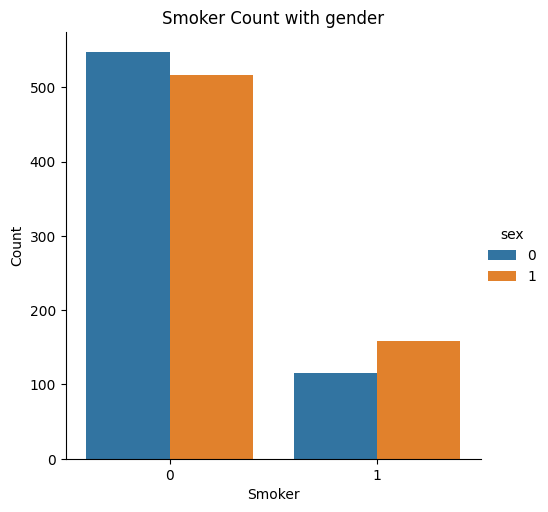

In [30]:
sns.catplot(x="smoker", kind="count",hue = 'sex', data=df)
plt.title('Smoker Count with gender')
plt.xlabel('Smoker')
plt.ylabel('Count')
plt.show()

<Axes: xlabel='sex', ylabel='charges'>

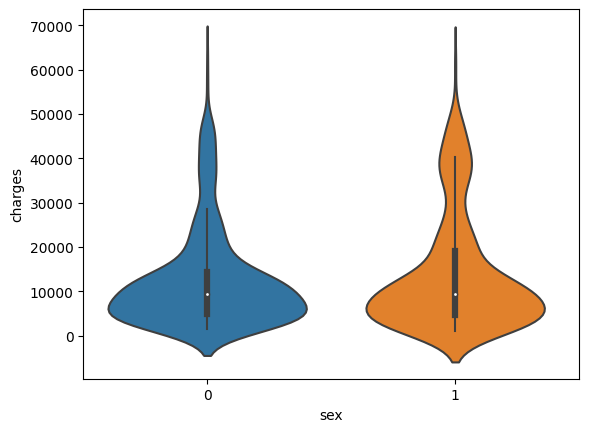

In [31]:
sns.violinplot(x = 'sex', y = 'charges', data = df)

<Axes: title={'center': 'Box plot for charges of women'}, xlabel='charges', ylabel='smoker'>

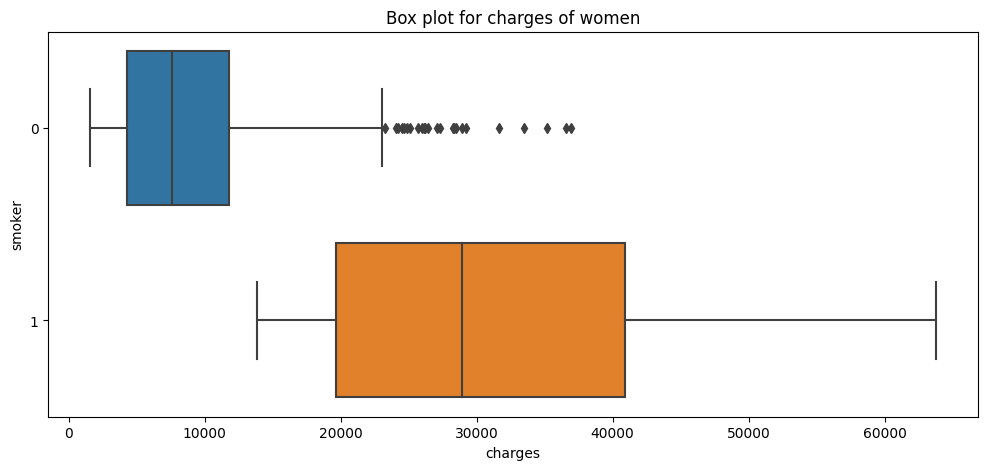

In [32]:
plt.figure(figsize=(12,5))
plt.title("Box plot for charges of women")
sns.boxplot(y="smoker", x="charges", data =  df[(df.sex == 0)] , orient="h")

<Axes: title={'center': 'Box plot for charges of men'}, xlabel='charges', ylabel='smoker'>

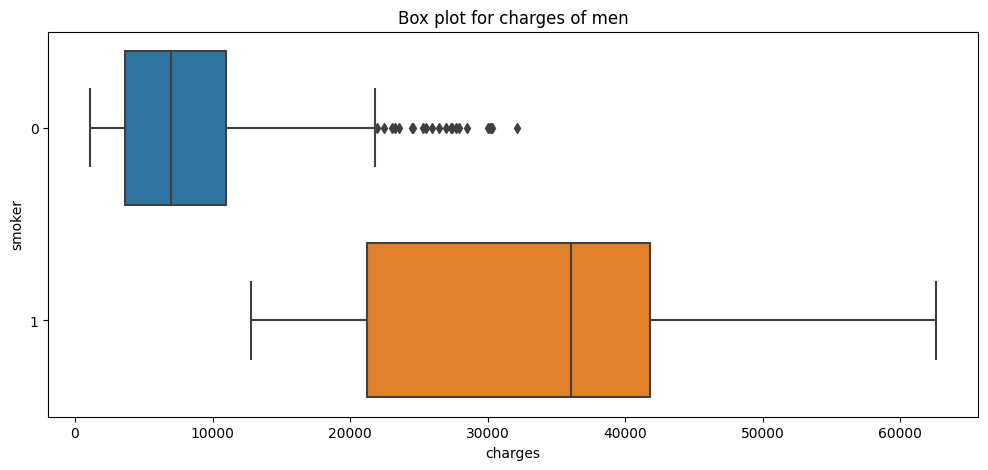

In [33]:
plt.figure(figsize=(12,5))
plt.title("Box plot for charges of men")
sns.boxplot(y="smoker", x="charges", data =  df[(df.sex == 1)] , orient="h")

The assumption is true, that the medical expense of males is greater than that of females. In addituion to that medical expense of smokers is greater than that of non-smokers.

**Smokers and age distribution**

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 7.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


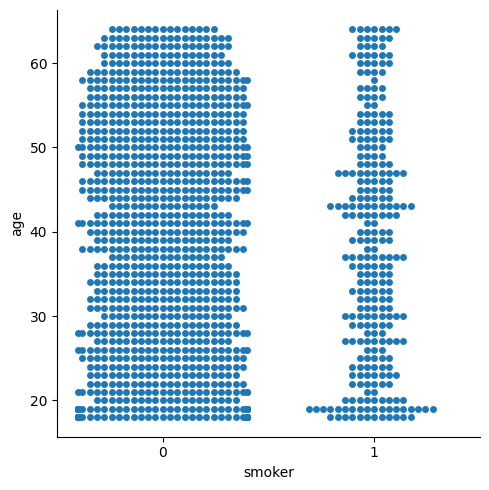

In [34]:
#smokers and age distribution
sns.catplot(x="smoker", y="age", kind="swarm", data=df)

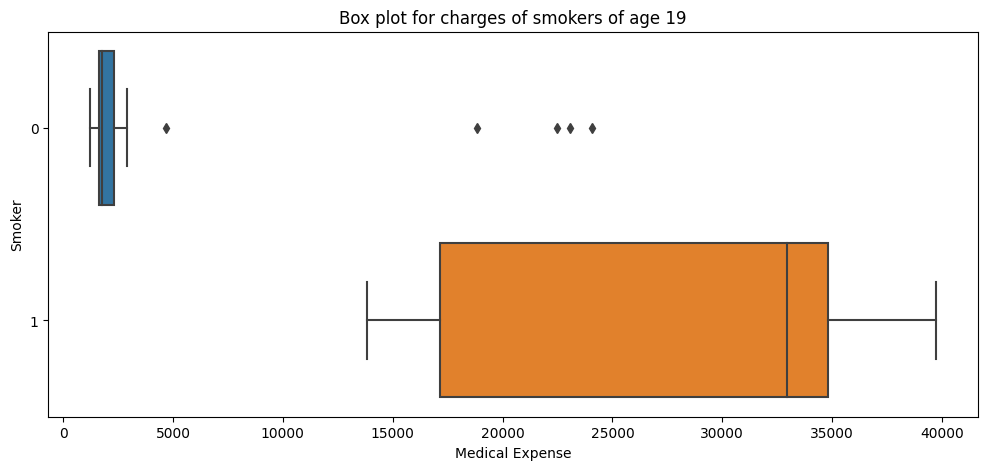

In [35]:
#smokers of age 19
plt.figure(figsize=(12,5))
plt.title("Box plot for charges of smokers of age 19")
sns.boxplot(y="smoker", x="charges", data =  df[(df.age == 19)] , orient="h")
plt.xlabel('Medical Expense')
plt.ylabel('Smoker')
plt.show()

Surprisingly the medical expense of smokers of age 19 is very high in comparison to non smokers. In non smokers we can see some outliners, which may be due to illness or accidents.

It is clear that the medical expense of smokers is higher than that of non-smokers. Now I will plot the charges distribution with repect to patients age of smokers and non-smokers.



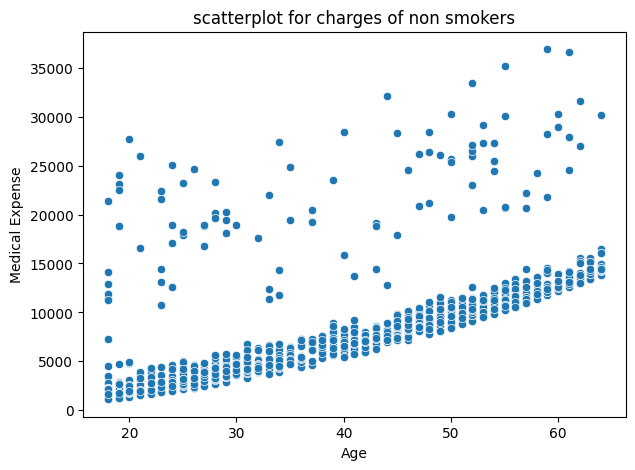

In [36]:
#non smokers charge distribution
plt.figure(figsize=(7,5))
plt.title("scatterplot for charges of non smokers")
sns.scatterplot(x="age", y="charges", data =  df[(df.smoker == 0)])
plt.xlabel('Age')
plt.ylabel('Medical Expense')
plt.show()

Majority of the points shows that medical expense increases with age which may be due to the fact that older people are more prone to illness. But there are some outliners which shows that there are other illness or accidents which may increase the medical expense.

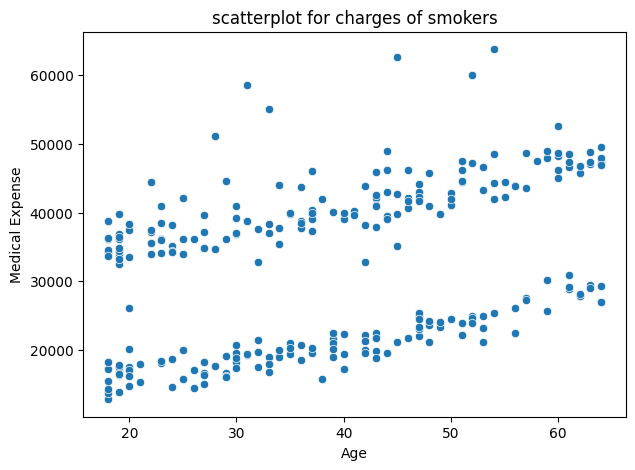

In [37]:
#smokers charge distribution
plt.figure(figsize=(7,5))
plt.title("scatterplot for charges of smokers")
sns.scatterplot(x="age", y="charges", data =  df[(df.smoker == 1)])
plt.xlabel('Age')
plt.ylabel('Medical Expense')
plt.show()

Here we see pecularity in the graph. In the graph there are two segments, one with high medical expense which may be due to smoking related illness and the other with low medical expense which may be due age related illness.

Now, in order to get a more clear picture, I will combine these two graphs.

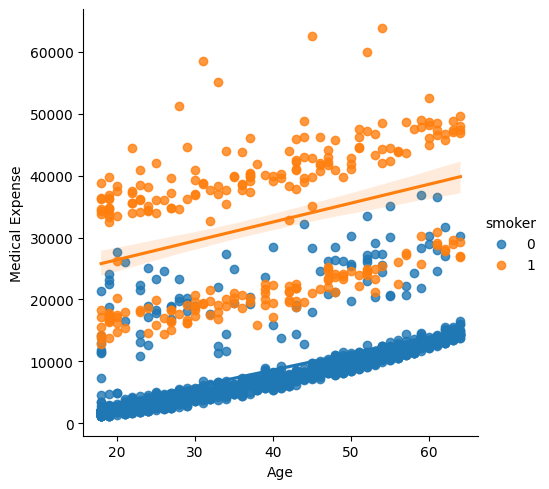

In [38]:
#age charges distribution

sns.lmplot(x="age", y="charges", data =  df, hue = 'smoker')
plt.xlabel('Age')
plt.ylabel('Medical Expense')
plt.show()

Now, we clearly understand the variation in charges with respect to age and smoking habits. The medical expense of smokers is higher than that of non-smokers. In non-smokers, the cost of treatment increases with age which is obvious. But in smokers, the cost of treatment is high even for younger patients, which means the smoking patients are spending upon their smoking related illness as well as age related illness.

**Charges distribution for patients with BMI greater than 30 i.e. obese patients**

<ipython-input-39-1572e034011d>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[(df.bmi >= 30)]['charges'])


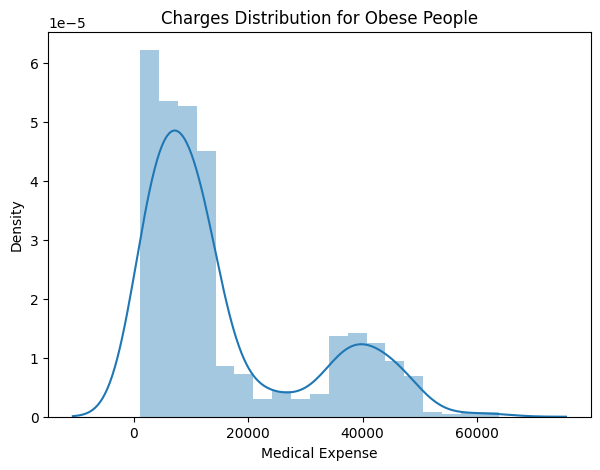

In [39]:
#bmi charges distribution for obese people
plt.figure(figsize=(7,5))
sns.distplot(df[(df.bmi >= 30)]['charges'])
plt.title('Charges Distribution for Obese People')
plt.xlabel('Medical Expense')
plt.show()

**Charges distribution for patients with BMI less than 30 i.e. healthy patients**

<ipython-input-40-1ad75a47c6a0>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[(df.bmi < 30)]['charges'])


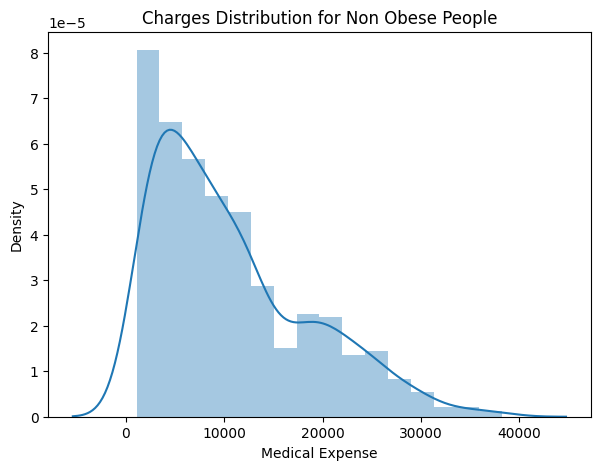

In [40]:
plt.figure(figsize=(7,5))
sns.distplot(df[(df.bmi < 30)]['charges'])
plt.title('Charges Distribution for Non Obese People')
plt.xlabel('Medical Expense')
plt.show()

Therefore, patients with BMI less than 30 are spending less on medical treatment than those with BMI greater than 30.

Through the EDA, we have a clear understanding about the data and the coorelation between the variables. Now, I will build a model to predict the medical expense of patients.

**Train Test Split**

In [41]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df.drop('charges',axis=1), df['charges'], test_size=0.2, random_state=0)

**Model Building**

In [42]:
#Linear Regression
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr

LinearRegression()

In [43]:
#model training
lr.fit(x_train,y_train)
#model accuracy
lr.score(x_train,y_train)

0.7368306228430945

In [44]:

#model prediction
y_pred = lr.predict(x_test)

In [45]:
#Polynomial Regression
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree=2)
poly_reg

PolynomialFeatures()

In [46]:
#transforming the features to higher degree
x_train_poly = poly_reg.fit_transform(x_train)
#splitting the data
x_train, x_test, y_train, y_test = train_test_split(x_train_poly, y_train, test_size=0.2, random_state=0)

In [47]:
plr = LinearRegression()
#model training
plr.fit(x_train,y_train)
#model accuracy
plr.score(x_train,y_train)

0.8372892271391211

In [48]:

#model prediction
y_pred = plr.predict(x_test)

In [49]:
#decision tree regressor
from sklearn.tree import DecisionTreeRegressor
dtree = DecisionTreeRegressor()
dtree

DecisionTreeRegressor()

In [50]:
#model training
dtree.fit(x_train,y_train)
#model accuracy
dtree.score(x_train,y_train)

0.9993688476658964

In [51]:
#model prediction
dtree_pred = dtree.predict(x_test)

In [52]:
#random forest regressor
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=100)
rf

RandomForestRegressor()

In [54]:
#model training
rf.fit(x_train,y_train)
#model accuracy
rf.score(x_train,y_train)

0.9741802979216952

In [55]:

#model prediction
rf_pred = rf.predict(x_test)

**Model Evaluation**

In [56]:

from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

Linear Regression

<ipython-input-57-2d0e63236188>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax1 = sns.distplot(y_test,hist=False,color='r',label='Actual Value')
<ipython-input-57-2d0e63236188>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_pred,hist=False,color='b',label='Predicted Value',ax=ax1)


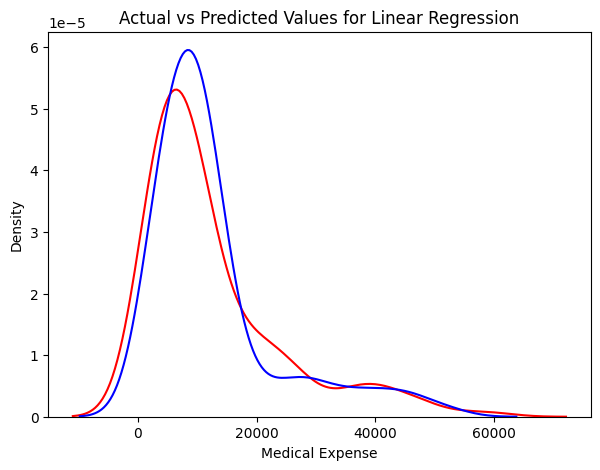

In [57]:
#distribution of actual and predicted values
plt.figure(figsize=(7,5))
ax1 = sns.distplot(y_test,hist=False,color='r',label='Actual Value')
sns.distplot(y_pred,hist=False,color='b',label='Predicted Value',ax=ax1)
plt.title('Actual vs Predicted Values for Linear Regression')
plt.xlabel('Medical Expense')
plt.show()


In [58]:
print('MAE:', mean_absolute_error(y_test, y_pred))
print('MSE:', mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred)))
print('R2 Score:', r2_score(y_test, y_pred))

MAE: 2988.626627897196
MSE: 24512834.56541676
RMSE: 4951.043785447344
R2 Score: 0.8221477010678055


Polynomial Regression

<ipython-input-59-7a574536b1bb>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax1 = sns.distplot(y_test,hist=False,color='r',label='Actual Value')
<ipython-input-59-7a574536b1bb>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_pred,hist=False,color='b',label='Predicted Value',ax=ax1)


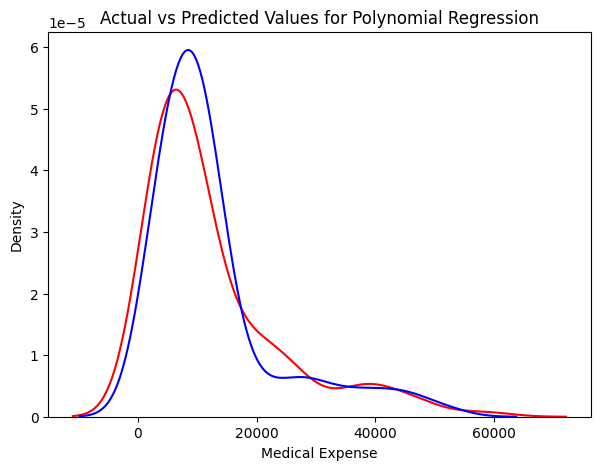

In [59]:
#acutal vs predicted values for polynomial regression
plt.figure(figsize=(7,5))
ax1 = sns.distplot(y_test,hist=False,color='r',label='Actual Value')
sns.distplot(y_pred,hist=False,color='b',label='Predicted Value',ax=ax1)
plt.title('Actual vs Predicted Values for Polynomial Regression')
plt.xlabel('Medical Expense')
plt.show()

In [60]:
print('MAE:', mean_absolute_error(y_test, y_pred))
print('MSE:', mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred)))
print('R2 Score:', r2_score(y_test, y_pred))

MAE: 2988.626627897196
MSE: 24512834.56541676
RMSE: 4951.043785447344
R2 Score: 0.8221477010678055


Decision Tree Regressor

<ipython-input-61-46f60f40ec0e>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(y_test, hist=False, color="r", label="Actual Value")
<ipython-input-61-46f60f40ec0e>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dtree_pred, hist=False, color="b", label="Fitted Values" ,

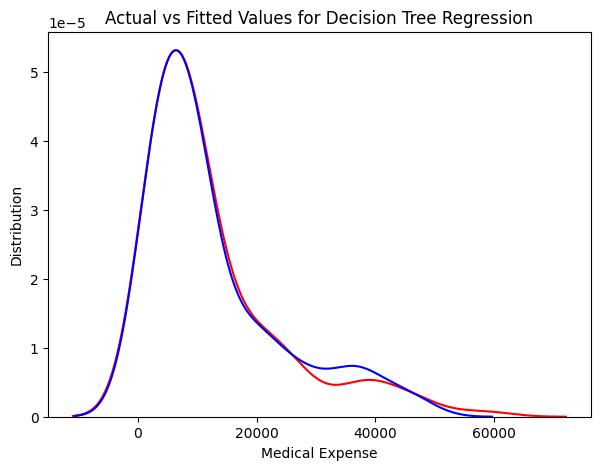

In [61]:
#distribution plot of actual and predicted values
plt.figure(figsize=(7,5))
ax = sns.distplot(y_test, hist=False, color="r", label="Actual Value")
sns.distplot(dtree_pred, hist=False, color="b", label="Fitted Values" , ax=ax)
plt.title('Actual vs Fitted Values for Decision Tree Regression')
plt.xlabel('Medical Expense')
plt.ylabel('Distribution')
plt.show()

In [62]:
print('MAE:', mean_absolute_error(y_test, dtree_pred))
print('MSE:', mean_squared_error(y_test, dtree_pred))
print('RMSE:', np.sqrt(mean_squared_error(y_test, dtree_pred)))
print('Accuracy:', dtree.score(x_test,y_test))

MAE: 3245.1498021962616
MSE: 46794871.288536884
RMSE: 6840.677692198112
Accuracy: 0.6604809038019578


Random Forest Regressor

<ipython-input-63-255136d82566>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(y_test, hist=False, color="r", label="Actual Value")
<ipython-input-63-255136d82566>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(rf_pred, hist=False, color="b", label="Fitted Values" , ax

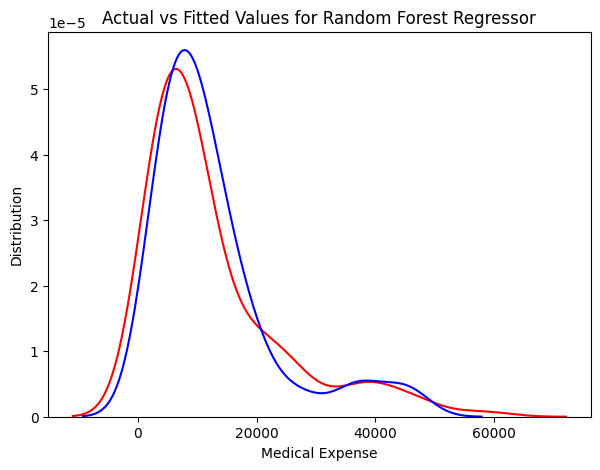

In [63]:
#distribution plot of actual and predicted values
plt.figure(figsize=(7,5))
ax = sns.distplot(y_test, hist=False, color="r", label="Actual Value")
sns.distplot(rf_pred, hist=False, color="b", label="Fitted Values" , ax=ax)
plt.title('Actual vs Fitted Values for Random Forest Regressor')
plt.xlabel('Medical Expense')
plt.ylabel('Distribution')
plt.show()

In [64]:
print('MAE:', mean_absolute_error(y_test, rf_pred))
print('MSE:', mean_squared_error(y_test, rf_pred))
print('RMSE:', np.sqrt(mean_squared_error(y_test, rf_pred)))
print('Accuracy:', rf.score(x_test,y_test))

MAE: 2852.721798159658
MSE: 26646975.90412483
RMSE: 5162.070892977433
Accuracy: 0.8066634884067795


**Conclusion**

From the overall analysis, we can conclude that the medical expense of patients depends on their age, BMI, smoking habits.